In [5]:
import os 
import shutil
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [9]:
%%time
df = pd.read_csv("C:/Users/bobbr/OneDrive/Documents/The Plan/NFL/2023/Modelling/rb_player_data_final.csv")
df = df.fillna(0)
df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
                      + df['Receiving Rec']*0.5 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
df = df[df['FantasyPoints']>0]
df = df[df['Year']>2015]
df = df[df['FantasyPoints']< 40]

CPU times: total: 52.3 s
Wall time: 54.3 s


In [10]:
df.head()

,Unnamed: 0,player_wk_year,Rk,Year,Date,G#,Age,Tm,home_away,Result,GS,Rushing Att,Rushing Yds,Rushing Y/A,Rushing TD,Receiving Tgt,Receiving Rec,Receiving Yds,Receiving Y/R,Receiving TD,Receiving Ctch%,Receiving Y/Tgt,Kick Returns Rt,Kick Returns Yds,Kick Returns Y/Rt,Kick Returns TD,Scoring TD,Scoring Pts,Fumbles Fmb,Fumbles FL,Fumbles FF,Fumbles FR,Fumbles Yds,Fumbles TD,Off. Snaps Num,Off. Snaps Pct,ST Snaps Num,ST Snaps Pct,Player,Scoring 2PM,Punt Returns Ret,Punt Returns Yds,Punt Returns Y/R,Punt Returns TD,Unnamed: 17_level_0Sk,Unnamed: 29_level_0Status,ScoringSfty,Date 1 wks ago,Week 1 wks ago,Age 1 wks ago,Tm 1 wks ago,home_away 1 wks ago,Opp 1 wks ago,Result 1 wks ago,Rushing Att 1 wks ago,Rushing Yds 1 wks ago,Rushing Y/A 1 wks ago,Rushing TD 1 wks ago,Receiving Tgt 1 wks ago,Receiving Rec 1 wks ago,Receiving Yds 1 wks ago,Receiving Y/R 1 wks ago,Receiving TD 1 wks ago,Receiving Ctch% 1 wks ago,Receiving Y/Tgt 1 wks ago,Kick Returns Rt 1 wks ago,Kick Returns Yds 1 wks ago,Kick Returns Y/Rt 1 wks ago,Kick Returns TD 1 wks ago,Scoring TD 1 wks ago,Scoring Pts 1 wks ago,Fumbles Fmb 1 wks ago,Fumbles FL 1 wks ago,Fumbles FF 1 wks ago,Fumbles FR 1 wks ago,Fumbles Yds 1 wks ago,Fumbles TD 1 wks ago,Off. Snaps Num 1 wks ago,Off. Snaps Pct 1 wks ago,ST Snaps Num 1 wks ago,ST Snaps Pct 1 wks ago,Player 1 wks ago,Scoring 2PM 1 wks ago,Punt Returns Ret 1 wks ago,Punt Returns Yds 1 wks ago,Punt Returns Y/R 1 wks ago,Punt Returns TD 1 wks ago,Unnamed: 17_level_0Sk 1 wks ago,Unnamed: 29_level_0Status 1 wks ago,ScoringSfty 1 wks ago,player_wk_year 1 wks ago,Date 2 wks ago,Week 2 wks ago,Age 2 wks ago,Tm 2 wks ago,home_away 2 wks ago,Opp 2 wks ago,Result 2 wks ago,Rushing Att 2 wks ago,Rushing Yds 2 wks ago,Rushing Y/A 2 wks ago,Rushing TD 2 wks ago,Receiving Tgt 2 wks ago,Receiving Rec 2 wks ago,Receiving Yds 2 wks ago,Receiving Y/R 2 wks ago,Receiving TD 2 wks ago,Receiving Ctch% 2 wks ago,Receiving Y/Tgt 2 wks ago,Kick Returns Rt 2 wks ago,Kick Returns Yds 2 wks ago,Kick Returns Y/Rt 2 wks ago,Kick Returns TD 2 wks ago,Scoring TD 2 wks ago,Scoring Pts 2 wks ago,Fumbles Fmb 2 wks ago,Fumbles FL 2 wks ago,Fumbles FF 2 wks ago,Fumbles FR 2 wks ago,Fumbles Yds 2 wks ago,Fumbles TD 2 wks ago,Off. Snaps Num 2 wks ago,Off. Snaps Pct 2 wks ago,ST Snaps Num 2 wks ago,ST Snaps Pct 2 wks ago,Player 2 wks ago,Scoring 2PM 2 wks ago,Punt Returns Ret 2 wks ago,Punt Returns Yds 2 wks ago,Punt Returns Y/R 2 wks ago,Punt Returns TD 2 wks ago,Unnamed: 17_level_0Sk 2 wks ago,Unnamed: 29_level_0Status 2 wks ago,ScoringSfty 2 wks ago,player_wk_year 2 wks ago,Date 3 wks ago,Week 3 wks ago,Age 3 wks ago,Tm 3 wks ago,home_away 3 wks ago,Opp 3 wks ago,Result 3 wks ago,Rushing Att 3 wks ago,Rushing Yds 3 wks ago,Rushing Y/A 3 wks ago,Rushing TD 3 wks ago,Receiving Tgt 3 wks ago,Receiving Rec 3 wks ago,Receiving Yds 3 wks ago,Receiving Y/R 3 wks ago,Receiving TD 3 wks ago,Receiving Ctch% 3 wks ago,Receiving Y/Tgt 3 wks ago,Kick Returns Rt 3 wks ago,Kick Returns Yds 3 wks ago,Kick Returns Y/Rt 3 wks ago,Kick Returns TD 3 wks ago,Scoring TD 3 wks ago,Scoring Pts 3 wks ago,Fumbles Fmb 3 wks ago,Fumbles FL 3 wks ago,Fumbles FF 3 wks ago,Fumbles FR 3 wks ago,Fumbles Yds 3 wks ago,Fumbles TD 3 wks ago,Off. Snaps Num 3 wks ago,Off. Snaps Pct 3 wks ago,ST Snaps Num 3 wks ago,ST Snaps Pct 3 wks ago,Player 3 wks ago,Scoring 2PM 3 wks ago,Punt Returns Ret 3 wks ago,Punt Returns Yds 3 wks ago,Punt Returns Y/R 3 wks ago,Punt Returns TD 3 wks ago,Unnamed: 17_level_0Sk 3 wks ago,Unnamed: 29_level_0Status 3 wks ago,ScoringSfty 3 wks ago,player_wk_year 3 wks ago,Date 4 wks ago,Week 4 wks ago,Age 4 wks ago,Tm 4 wks ago,home_away 4 wks ago,Opp 4 wks ago,Result 4 wks ago,Rushing Att 4 wks ago,Rushing Yds 4 wks ago,Rushing Y/A 4 wks ago,Rushing TD 4 wks ago,Receiving Tgt 4 wks ago,Receiving Rec 4 wks ago,Receiving Yds 4 wks ago,Receiving Y/R 4 wks ago,Receiving TD 4 wks ago,Receiving Ctch% 4 wks ago,Receiving Y/Tgt 4 wks ago,Kick Returns Rt 4 wks ago,Kick Returns Yds 4 wks ago,

<Axes: xlabel='FantasyPoints', ylabel='Density'>

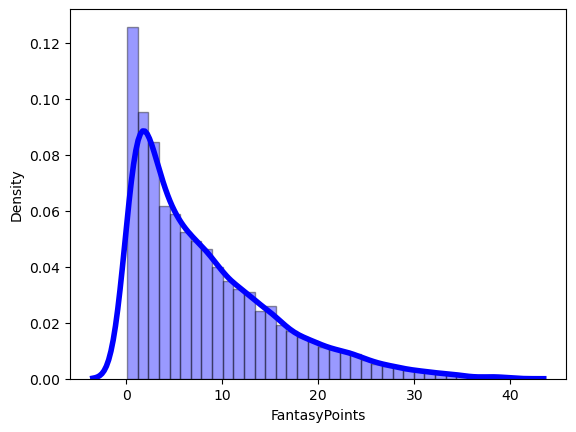

In [11]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(df['FantasyPoints'], color = 'blue', edgecolor = 'black',
#         bins = int(180/5))

# seaborn histogram
sns.distplot(df['FantasyPoints'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
            kde_kws = {'linewidth':4})
# Add labels
##plt.title('Histogram of Fantasy Points')
#plt.xlabel('FantasyPoints')
#plt.ylabel('Count')

In [12]:

df = df.drop(columns = ['Unnamed: 0',# 'Unnamed: 0.1',
#'player_wk_year',
'Player ',
'Fumbles FF','Fumbles FL','Fumbles FR','Fumbles Fmb',
'Fumbles TD','Fumbles Yds','Kick Returns Rt','Kick Returns TD',
'Kick Returns Y/Rt','Kick Returns Yds','Off. Snaps Num','Off. Snaps Pct',
'Punt Returns Ret','Punt Returns TD','Punt Returns Y/R','Punt Returns Yds',
'Receiving Ctch%','Receiving Rec','Receiving TD','Receiving Tgt',
'Receiving Y/R','Receiving Y/Tgt','Receiving Yds','Rushing Att',
'Rushing TD','Rushing Y/A','Rushing Yds','ST Snaps Num',
'ST Snaps Pct','Scoring 2PM','Scoring Pts',#'Scoring Sfty',
'Scoring TD',
#'Rk',
'GS',
#'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago',
                       'opp_wk_year',
                        'opp opp_wk_year 1wks ago', 
                        'opp opp_wk_year 2wks ago', 
                        'opp opp_wk_year 3wks ago', 
                        'opp opp_wk_year 4wks ago', 
                        'opp opp_wk_year 5wks ago', 
                        'opp opp_wk_year 6wks ago',
                        'opp opp_wk_year 7wks ago', 
                        'opp opp_wk_year 8wks ago', 
                        'opp opp_wk_year 9wks ago',
                        'opp opp_wk_year 10wks ago',
                        'opp opp_wk_year 11wks ago',
                        'opp opp_wk_year 12wks ago',
                        'opp opp_wk_year 13wks ago',
                        'opp opp_wk_year 14wks ago',
                        'opp opp_wk_year 15wks ago',
                        'opp opp_wk_year 16wks ago',
                        'opp opp_wk_year 17wks ago', 
                        'opp opp_wk_year 18wks ago',
                        'opp opp_wk_year 19wks ago',
                        'opp opp_wk_year 20wks ago',
                        'opp opp_wk_year 21wks ago',
                        'opp opp_wk_year 22wks ago',
                        'opp opp_wk_year 23wks ago', 
                        'opp opp_wk_year 24wks ago', 
                        'opp opp_wk_year 25wks ago', 
                        'opp opp_wk_year 26wks ago', 
                        'opp opp_wk_year 27wks ago', 
                        'opp opp_wk_year 28wks ago', 
                        'opp opp_wk_year 29wks ago',
                        'opp opp_wk_year 30wks ago',
                        'opp opp_wk_year 31wks ago',
                        'opp opp_wk_year 32wks ago',
                        'opp opp_wk_year 33wks ago',
                        'opp opp_wk_year 34wks ago',
                        'opp opp_wk_year 35wks ago', 
                        'def matchup opp_wk_year 1wks ago',
                        'def matchup opp_wk_year 2wks ago',
                        'def matchup opp_wk_year 3wks ago',
                       'def matchup opp_wk_year 4wks ago', 
                        'def matchup opp_wk_year 5wks ago',
                        'def matchup opp_wk_year 6wks ago',
                        'def matchup opp_wk_year 7wks ago',
                        'def matchup opp_wk_year 8wks ago',
                        'def matchup opp_wk_year 9wks ago', 
                       'def matchup opp_wk_year 10wks ago',
                        'def matchup opp_wk_year 11wks ago',
                        'def matchup opp_wk_year 12wks ago', 
                        'def matchup opp_wk_year 13wks ago', 
                        'def matchup opp_wk_year 14wks ago',
                        'def matchup opp_wk_year 15wks ago', 
                        'def matchup opp_wk_year 16wks ago', 
                        'def matchup opp_wk_year 17wks ago', 
                        'def matchup opp_wk_year 18wks ago', 
                        'def matchup opp_wk_year 19wks ago', 
                        'def matchup opp_wk_year 20wks ago', 
                       'def matchup opp_wk_year 21wks ago',
                       'def matchup opp_wk_year 22wks ago',
                        'def matchup opp_wk_year 23wks ago',
                        'def matchup opp_wk_year 24wks ago', 
                        'def matchup opp_wk_year 25wks ago', 
                        'def matchup opp_wk_year 26wks ago', 
                        'def matchup opp_wk_year 27wks ago',
                        'def matchup opp_wk_year 28wks ago',
                        'def matchup opp_wk_year 29wks ago',
                        'def matchup opp_wk_year 30wks ago', 
                      'def matchup opp_wk_year 31wks ago', 
                        'def matchup opp_wk_year 32wks ago', 
                        'def matchup opp_wk_year 33wks ago', 
                        'def matchup opp_wk_year 34wks ago', 
                        'def matchup opp_wk_year 35wks ago'
                       
          ]

)

In [5]:
#df['Passing Cmp% 1 wks ago'] = df['Passing Cmp% 1 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 1 wks ago'] = df['Off. Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 2 wks ago'] = df['Passing Cmp% 2 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 2 wks ago'] = df['Off. Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 3 wks ago'] = df['Passing Cmp% 3 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 3 wks ago'] = df['Off. Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 4 wks ago'] = df['Passing Cmp% 4 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 4 wks ago'] = df['Off. Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 5 wks ago'] = df['Passing Cmp% 5 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 5 wks ago'] = df['Off. Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 6 wks ago'] = df['Passing Cmp% 6 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 6 wks ago'] = df['Off. Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 7 wks ago'] = df['Passing Cmp% 7 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 7 wks ago'] = df['Off. Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 8 wks ago'] = df['Passing Cmp% 8 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 8 wks ago'] = df['Off. Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 9 wks ago'] = df['Passing Cmp% 9 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 9 wks ago'] = df['Off. Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 10 wks ago'] = df['Passing Cmp% 10 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 10 wks ago'] = df['Off. Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 11 wks ago'] = df['Passing Cmp% 11 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 11 wks ago'] = df['Off. Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 12 wks ago'] = df['Passing Cmp% 12 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 12 wks ago'] = df['Off. Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 13 wks ago'] = df['Passing Cmp% 13 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 13 wks ago'] = df['Off. Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 14 wks ago'] = df['Passing Cmp% 14 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 14 wks ago'] = df['Off. Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 15 wks ago'] = df['Passing Cmp% 15 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 15 wks ago'] = df['Off. Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 16 wks ago'] = df['Passing Cmp% 16 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 16 wks ago'] = df['Off. Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 17 wks ago'] = df['Passing Cmp% 17 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 17 wks ago'] = df['Off. Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 18 wks ago'] = df['Passing Cmp% 18 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 18 wks ago'] = df['Off. Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 19 wks ago'] = df['Passing Cmp% 19 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 19 wks ago'] = df['Off. Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 20 wks ago'] = df['Passing Cmp% 20 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 20 wks ago'] = df['Off. Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 21 wks ago'] = df['Passing Cmp% 21 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 21 wks ago'] = df['Off. Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 22 wks ago'] = df['Passing Cmp% 22 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 22 wks ago'] = df['Off. Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 23 wks ago'] = df['Passing Cmp% 23 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 23 wks ago'] = df['Off. Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 24 wks ago'] = df['Passing Cmp% 24 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 24 wks ago'] = df['Off. Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 25 wks ago'] = df['Passing Cmp% 25 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 25 wks ago'] = df['Off. Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 26 wks ago'] = df['Passing Cmp% 26 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 26 wks ago'] = df['Off. Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 27 wks ago'] = df['Passing Cmp% 27 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 27 wks ago'] = df['Off. Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 28 wks ago'] = df['Passing Cmp% 28 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 28 wks ago'] = df['Off. Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 29 wks ago'] = df['Passing Cmp% 29 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 29 wks ago'] = df['Off. Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 30 wks ago'] = df['Passing Cmp% 30 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 30 wks ago'] = df['Off. Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 31 wks ago'] = df['Passing Cmp% 31 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 31 wks ago'] = df['Off. Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 32 wks ago'] = df['Passing Cmp% 32 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 32 wks ago'] = df['Off. Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 33 wks ago'] = df['Passing Cmp% 33 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 33 wks ago'] = df['Off. Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 34 wks ago'] = df['Passing Cmp% 34 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 34 wks ago'] = df['Off. Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 35 wks ago'] = df['Passing Cmp% 35 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0

In [6]:
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].astype('float') / 100.0
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 2 wks ago'] = df['ST Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 3 wks ago'] = df['ST Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 4 wks ago'] = df['ST Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 5 wks ago'] = df['ST Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 6 wks ago'] = df['ST Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 7 wks ago'] = df['ST Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 8 wks ago'] = df['ST Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 9 wks ago'] = df['ST Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 10 wks ago'] = df['ST Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 11 wks ago'] = df['ST Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 12 wks ago'] = df['ST Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 13 wks ago'] = df['ST Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 14 wks ago'] = df['ST Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 15 wks ago'] = df['ST Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 16 wks ago'] = df['ST Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 17 wks ago'] = df['ST Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 18 wks ago'] = df['ST Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 19 wks ago'] = df['ST Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 20 wks ago'] = df['ST Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 21 wks ago'] = df['ST Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 22 wks ago'] = df['ST Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 23 wks ago'] = df['ST Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 24 wks ago'] = df['ST Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 25 wks ago'] = df['ST Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 26 wks ago'] = df['ST Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 27 wks ago'] = df['ST Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 28 wks ago'] = df['ST Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 29 wks ago'] = df['ST Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 30 wks ago'] = df['ST Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 31 wks ago'] = df['ST Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 32 wks ago'] = df['ST Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 33 wks ago'] = df['ST Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 34 wks ago'] = df['ST Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [13]:
df['sum Off. Snaps Pct 2wk trend'] = df['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 2wk trend'] = df['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 2wk trend'] = df['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 2wk trend'] = df['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 3wk trend'] = df['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 3wk trend'] = df['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 3wk trend'] = df['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 3wk trend'] = df['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 4wk trend'] = df['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 4wk trend'] = df['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 4wk trend'] = df['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 4wk trend'] = df['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 5wk trend'] = df['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 5wk trend'] = df['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 5wk trend'] = df['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 5wk trend'] = df['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 6wk trend'] = df['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 6wk trend'] = df['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 6wk trend'] = df['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 6wk trend'] = df['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 9wk trend'] = df['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 9wk trend'] = df['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 9wk trend'] = df['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 9wk trend'] = df['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 12wk trend'] = df['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 12wk trend'] = df['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 12wk trend'] = df['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 12wk trend'] = df['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 15wk trend'] = df['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 15wk trend'] = df['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 15wk trend'] = df['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 15wk trend'] = df['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 18wk trend'] = df['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 18wk trend'] = df['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 18wk trend'] = df['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 18wk trend'] = df['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 24wk trend'] = df['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 24wk trend'] = df['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 24wk trend'] = df['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 24wk trend'] = df['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 30wk trend'] = df['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 30wk trend'] = df['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 30wk trend'] = df['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 30wk trend'] = df['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

#df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df['sum ST Snaps Pct 2wk trend'] = df['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 2wk trend'] = df['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 2wk trend'] = df['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 2wk trend'] = df['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 3wk trend'] = df['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 3wk trend'] = df['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 3wk trend'] = df['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 3wk trend'] = df['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 4wk trend'] = df['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 4wk trend'] = df['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 4wk trend'] = df['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 4wk trend'] = df['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 5wk trend'] = df['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 5wk trend'] = df['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 5wk trend'] = df['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 5wk trend'] = df['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 6wk trend'] = df['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 6wk trend'] = df['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 6wk trend'] = df['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 6wk trend'] = df['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 9wk trend'] = df['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 9wk trend'] = df['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 9wk trend'] = df['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 9wk trend'] = df['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 12wk trend'] = df['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 12wk trend'] = df['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 12wk trend'] = df['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 12wk trend'] = df['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 15wk trend'] = df['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 15wk trend'] = df['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 15wk trend'] = df['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 15wk trend'] = df['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 18wk trend'] = df['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 18wk trend'] = df['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 18wk trend'] = df['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 18wk trend'] = df['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 24wk trend'] = df['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 24wk trend'] = df['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 24wk trend'] = df['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 24wk trend'] = df['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 30wk trend'] = df['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 30wk trend'] = df['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 30wk trend'] = df['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 30wk trend'] = df['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [14]:
#Off. Snaps Pct 35 wks ago, Receiving Ctch% 35 wks ago, ST Snaps Pct 35 wks ago
df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [10]:
#df['Receiving Ctch% 1 wks ago'] = df['Receiving Ctch% 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 2 wks ago'] = df['Receiving Ctch% 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 3 wks ago'] = df['Receiving Ctch% 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 4 wks ago'] = df['Receiving Ctch% 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 5 wks ago'] = df['Receiving Ctch% 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 6 wks ago'] = df['Receiving Ctch% 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 7 wks ago'] = df['Receiving Ctch% 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 8 wks ago'] = df['Receiving Ctch% 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 9 wks ago'] = df['Receiving Ctch% 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 10 wks ago'] = df['Receiving Ctch% 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 11 wks ago'] = df['Receiving Ctch% 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 12 wks ago'] = df['Receiving Ctch% 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 13 wks ago'] = df['Receiving Ctch% 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 14 wks ago'] = df['Receiving Ctch% 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 15 wks ago'] = df['Receiving Ctch% 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 16 wks ago'] = df['Receiving Ctch% 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 17 wks ago'] = df['Receiving Ctch% 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 18 wks ago'] = df['Receiving Ctch% 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 19 wks ago'] = df['Receiving Ctch% 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 20 wks ago'] = df['Receiving Ctch% 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 21 wks ago'] = df['Receiving Ctch% 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 22 wks ago'] = df['Receiving Ctch% 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 23 wks ago'] = df['Receiving Ctch% 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 24 wks ago'] = df['Receiving Ctch% 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 25 wks ago'] = df['Receiving Ctch% 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 26 wks ago'] = df['Receiving Ctch% 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 27 wks ago'] = df['Receiving Ctch% 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 28 wks ago'] = df['Receiving Ctch% 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 29 wks ago'] = df['Receiving Ctch% 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 30 wks ago'] = df['Receiving Ctch% 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 31 wks ago'] = df['Receiving Ctch% 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 32 wks ago'] = df['Receiving Ctch% 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 33 wks ago'] = df['Receiving Ctch% 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 34 wks ago'] = df['Receiving Ctch% 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [16]:
df = shuffle(df, random_state = 0)
#df_oob = df[df['Year'] == 2021]
#df =df[~df['player_wk_year'].str.contains('3 2022')]
#df = df[(df['Year']) > 2015]
#df_test = df[(df['Year'] != 2022) & (df['Week'] != 3)]
df = df.drop(columns = ['Year'])
#df_oob = df_oob.drop(columns = ['Year'])

#print(df_oob.shape, df.shape)

In [17]:
# Importing the libraries
#import pyspark.sql.functions as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
import shutil
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 300)

from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as sklmetrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import optuna

In [18]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [19]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [20]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [21]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[19:07:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  7.160970


In [22]:
if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [1]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

NameError: name 'optuna' is not defined

In [24]:

imp_dict = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain = pd.DataFrame(imp_dict.items(), columns=['variable', 'weight'])
imp_total_gain = imp_total_gain.sort_values(by = 'weight',ascending=False)
  

In [25]:
imp_total_gain.head()

,variable,weight
2970,sum Off. Snaps Num 5wk trend,0.704089
3666,sum Rushing Yds 3wk trend,0.506332
3662,sum Rushing Yds 2wk trend,0.472364
29,Off. Snaps Pct 1 wks ago,0.295727
3670,sum Rushing Yds 4wk trend,0.284246


In [26]:

z = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test=pd.DataFrame(z)
test = test.sort_values(by="feature_importances",ascending = False)


In [27]:
test.head(20)

,features,feature_importances
2970,sum Off. Snaps Num 5wk trend,0.168662
3666,sum Rushing Yds 3wk trend,0.121290
3662,sum Rushing Yds 2wk trend,0.113153
29,Off. Snaps Pct 1 wks ago,0.070840
3670,sum Rushing Yds 4wk trend,0.068090
3522,sum Receiving Yds 24wk trend,0.051216
3674,sum Rushing Yds 5wk trend,0.048003
3526,sum Receiving Yds 30wk trend,0.043205
6,Rushing Yds 1 wks ago,0.038956
3518,sum Receiving Yds 18wk trend,0.038231


In [28]:

feat_imp = pd.merge(imp_total_gain, test,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp = feat_imp.head(100)
  

,variable,weight,features,feature_importances
0,sum Off. Snaps Num 5wk trend,0.704089,sum Off. Snaps Num 5wk trend,0.168662
1,sum Rushing Yds 3wk trend,0.506332,sum Rushing Yds 3wk trend,0.121290
2,sum Rushing Yds 2wk trend,0.472364,sum Rushing Yds 2wk trend,0.113153
3,Off. Snaps Pct 1 wks ago,0.295727,Off. Snaps Pct 1 wks ago,0.070840
4,sum Rushing Yds 4wk trend,0.284246,sum Rushing Yds 4wk trend,0.068090
5,sum Receiving Yds 24wk trend,0.213803,sum Receiving Yds 24wk trend,0.051216
6,sum Rushing Yds 5wk trend,0.200391,sum Rushing Yds 5wk trend,0.048003
7,sum Receiving Yds 30wk trend,0.180362,sum Receiving Yds 30wk trend,0.043205
8,Rushing Yds 1 wks ago,0.162624,Rushing Yds 1 wks ago,0.038956
9,sum Receiving Yds 18wk trend,0.159596,sum Receiving Yds 18wk trend,0.038231


In [29]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [30]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
13957,13.7,24.027521,Christian McCaffrey 13 2019
1210,15.6,23.706009,Le'Veon Bell 15 2016
13955,24.6,23.554487,Christian McCaffrey 11 2019
8308,16.9,23.549173,Todd Gurley 9 2018
1225,25.0,23.078047,Le'Veon Bell 15 2017
13956,29.8,23.059624,Christian McCaffrey 12 2019
8306,28.6,22.887676,Todd Gurley 7 2018
13948,26.3,22.789644,Christian McCaffrey 3 2019
8309,23.5,22.786106,Todd Gurley 10 2018
13941,26.6,22.476793,Christian McCaffrey 13 2018


In [31]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [32]:
test[test['player_wk_year'].str.contains('2022')][['y','Prob','player_wk_year']].sort_values(by = 'Prob', ascending = False)

,y,Prob,player_wk_year
11073,18.4,20.232136,Josh Jacobs 14 2022
5763,8.0,19.778461,Austin Ekeler 18 2022
11075,5.5,18.410280,Josh Jacobs 16 2022
11076,17.5,17.474964,Josh Jacobs 17 2022
6830,3.6,17.469032,Leonard Fournette 7 2022
13988,15.4,17.330034,Christian McCaffrey 18 2022
17273,23.6,17.295212,Tony Pollard 13 2022
11066,35.0,16.884708,Josh Jacobs 7 2022
20683,17.3,16.883890,Jonathan Taylor 12 2022
5748,13.9,16.467089,Austin Ekeler 2 2022


In [34]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,player_wk_year
13989,24.4,17.757042,Christian McCaffrey 1 2023
3722,14.7,14.849681,Nick Chubb 1 2023
4284,7.4,12.646555,Dalvin Cook 1 2023
855,7.8,10.639474,Saquon Barkley 1 2023
23222,6.2,10.611982,Jamaal Williams 1 2023
4301,8.3,9.342142,James Cook 1 2023
22628,5.9,8.670924,Rachaad White 1 2023
15034,1.0,8.551981,Elijah Mitchell 1 2023
19255,1.5,8.412606,Devin Singletary 1 2023
3432,1.1,5.947029,Zach Charbonnet 1 2023


In [35]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,player_wk_year
11078,8.1,20.199039,Josh Jacobs 1 2023
8938,12.9,16.277756,Derrick Henry 1 2023
361,22.9,15.696692,Tyler Allgeier 1 2023
11849,25.7,15.229173,Aaron Jones 1 2023
17278,21.2,14.800643,Tony Pollard 1 2023
242,8.9,14.771543,Cam Akers 1 2023
8624,4.3,14.653183,Najee Harris 1 2023
21834,8.7,14.370299,Kenneth Walker III 1 2023
5764,24.4,14.123363,Austin Ekeler 1 2023
15115,8.8,13.078243,Joe Mixon 1 2023


In [37]:
top_feat_list=feat_imp.variable.to_list()
top_feat_list.append('player_wk_year')

In [38]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
X = X[top_feat_list]
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [39]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [40]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [41]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  7.047231


In [42]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-15 19:19:43,922] A new study created in memory with name: no-name-be02dad8-f238-490d-9674-a572a3bbba96
[I 2023-09-15 19:19:47,977] Trial 0 finished with value: 6.473507995232307 and parameters: {'booster': 'gblinear', 'lambda': 0.03545227481439735, 'alpha': 5.529551777734118e-07, 'subsample': 0.6878668346210204, 'colsample_bytree': 0.47527617227763247}. Best is trial 0 with value: 6.473507995232307.


RMSE :  6.473508


[I 2023-09-15 19:19:54,062] Trial 1 finished with value: 6.823601645389031 and parameters: {'booster': 'dart', 'lambda': 7.820080953584135e-05, 'alpha': 6.357493804180064e-06, 'subsample': 0.23083627171131252, 'colsample_bytree': 0.7075620921929642, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.11377537977782648, 'gamma': 3.108196450478071e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 8.175253752846626e-05, 'skip_drop': 3.999820294776611e-06}. Best is trial 0 with value: 6.473507995232307.


RMSE :  6.823602


[I 2023-09-15 19:19:58,759] Trial 2 finished with value: 6.519059708003645 and parameters: {'booster': 'gblinear', 'lambda': 0.012133727470183894, 'alpha': 5.207309583137414e-07, 'subsample': 0.783272915120679, 'colsample_bytree': 0.8007276145421385}. Best is trial 0 with value: 6.473507995232307.


RMSE :  6.519060


[I 2023-09-15 19:20:05,915] Trial 3 finished with value: 10.728062218970102 and parameters: {'booster': 'dart', 'lambda': 7.31890793959139e-06, 'alpha': 0.5361472325773643, 'subsample': 0.26608125879004674, 'colsample_bytree': 0.8782972078051403, 'max_depth': 7, 'min_child_weight': 4, 'eta': 1.483414469650201e-08, 'gamma': 5.683569772991086e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.453961277719739e-05, 'skip_drop': 3.3975886907968884e-08}. Best is trial 0 with value: 6.473507995232307.


RMSE :  10.728062


[I 2023-09-15 19:20:14,814] Trial 4 finished with value: 10.728053108294937 and parameters: {'booster': 'dart', 'lambda': 1.5332748541346489e-07, 'alpha': 0.03998491228853246, 'subsample': 0.9149897907905638, 'colsample_bytree': 0.8925466956640062, 'max_depth': 9, 'min_child_weight': 10, 'eta': 1.4303707090264265e-07, 'gamma': 1.054995422935947e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.7398276136360094e-05, 'skip_drop': 4.794645579599939e-06}. Best is trial 0 with value: 6.473507995232307.


RMSE :  10.728053


[I 2023-09-15 19:20:19,259] Trial 5 finished with value: 10.72663746425122 and parameters: {'booster': 'gbtree', 'lambda': 0.005397213596869465, 'alpha': 2.617715286592481e-07, 'subsample': 0.4030816882652055, 'colsample_bytree': 0.7082754189897196, 'max_depth': 3, 'min_child_weight': 10, 'eta': 2.0617508551484882e-05, 'gamma': 1.4680833653941827e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 6.473507995232307.


RMSE :  10.726637


[I 2023-09-15 19:20:25,579] Trial 6 finished with value: 10.728062198399476 and parameters: {'booster': 'dart', 'lambda': 0.19806251224889912, 'alpha': 0.053089778164828974, 'subsample': 0.2986371599042939, 'colsample_bytree': 0.37786307440314604, 'max_depth': 7, 'min_child_weight': 2, 'eta': 1.542618447839831e-08, 'gamma': 1.7812703713278564e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.01430054139442112, 'skip_drop': 9.590595705782387e-08}. Best is trial 0 with value: 6.473507995232307.


RMSE :  10.728062


[I 2023-09-15 19:20:30,464] Trial 7 finished with value: 10.724464556900234 and parameters: {'booster': 'gbtree', 'lambda': 2.135135139100759e-08, 'alpha': 1.8235160352016178e-06, 'subsample': 0.6456136182771768, 'colsample_bytree': 0.4316973421820627, 'max_depth': 5, 'min_child_weight': 7, 'eta': 5.1186133974198476e-05, 'gamma': 5.557365253833472e-08, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 6.473507995232307.


RMSE :  10.724465


[I 2023-09-15 19:20:37,955] Trial 8 finished with value: 9.279211224811261 and parameters: {'booster': 'dart', 'lambda': 0.44195125759773973, 'alpha': 0.001511311600235326, 'subsample': 0.3500492301188284, 'colsample_bytree': 0.7906207740457447, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.024715701883382044, 'gamma': 0.4554851164376727, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.828880326131514e-06, 'skip_drop': 0.2731110747911414}. Best is trial 0 with value: 6.473507995232307.


RMSE :  9.279211


[I 2023-09-15 19:20:42,936] Trial 9 finished with value: 6.303145630744775 and parameters: {'booster': 'dart', 'lambda': 0.2789082864297594, 'alpha': 0.0008114845537082779, 'subsample': 0.8943539993445022, 'colsample_bytree': 0.4877700960170517, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.4013330935365127, 'gamma': 6.064632198879919e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.2101486882228678e-08, 'skip_drop': 3.19992749023301e-06}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.303146


[I 2023-09-15 19:20:46,804] Trial 10 finished with value: 6.89515201030765 and parameters: {'booster': 'gbtree', 'lambda': 0.8512047889797343, 'alpha': 1.0391922278971672e-08, 'subsample': 0.9898418420868477, 'colsample_bytree': 0.22621129719700916, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.83450552551627, 'gamma': 0.02991272583385944, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.895152


[I 2023-09-15 19:20:50,195] Trial 11 finished with value: 6.544620348904176 and parameters: {'booster': 'gblinear', 'lambda': 0.008849356109399612, 'alpha': 0.00016594735919192813, 'subsample': 0.7566749455836493, 'colsample_bytree': 0.5400421101026741}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.544620


[I 2023-09-15 19:20:53,583] Trial 12 finished with value: 6.48765347591226 and parameters: {'booster': 'gblinear', 'lambda': 0.029059683749583464, 'alpha': 6.595584654703534e-05, 'subsample': 0.5017696015591399, 'colsample_bytree': 0.5527540772838626}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.487653


[I 2023-09-15 19:20:56,837] Trial 13 finished with value: 6.633688270362681 and parameters: {'booster': 'gblinear', 'lambda': 0.0008304951915194789, 'alpha': 0.0007545252988646546, 'subsample': 0.812065446567076, 'colsample_bytree': 0.456536012973165}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.633688


[I 2023-09-15 19:21:00,223] Trial 14 finished with value: 6.454476018982231 and parameters: {'booster': 'gblinear', 'lambda': 0.06863913778550235, 'alpha': 1.759013801119875e-05, 'subsample': 0.6406525904469582, 'colsample_bytree': 0.6159524427568227}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.454476


[I 2023-09-15 19:21:05,729] Trial 15 finished with value: 10.399664422646541 and parameters: {'booster': 'dart', 'lambda': 0.7406776448526107, 'alpha': 3.335129305919117e-05, 'subsample': 0.5765069109441594, 'colsample_bytree': 0.6405835274993593, 'max_depth': 3, 'min_child_weight': 2, 'eta': 0.0049137011675078855, 'gamma': 0.0015847984675129026, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.6729187274372544e-08, 'skip_drop': 0.0015041659838308697}. Best is trial 9 with value: 6.303145630744775.


RMSE :  10.399664


[I 2023-09-15 19:21:08,926] Trial 16 finished with value: 6.437561292501116 and parameters: {'booster': 'gblinear', 'lambda': 0.09320143134911985, 'alpha': 0.0016162269910070574, 'subsample': 0.8751674066121333, 'colsample_bytree': 0.9723445422738453}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.437561


[I 2023-09-15 19:21:12,133] Trial 17 finished with value: 6.581913752719618 and parameters: {'booster': 'gblinear', 'lambda': 0.0012689115026915461, 'alpha': 0.002205065990823559, 'subsample': 0.9007791631515724, 'colsample_bytree': 0.899893945190244}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.581914


[I 2023-09-15 19:21:19,102] Trial 18 finished with value: 10.623159943772318 and parameters: {'booster': 'dart', 'lambda': 0.09745752884205161, 'alpha': 0.010297135604173228, 'subsample': 0.8977214265568372, 'colsample_bytree': 0.9866191826872835, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.0015113890760284387, 'gamma': 0.0006742941183127626, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.2429868792179066e-08, 'skip_drop': 0.00031545721576869463}. Best is trial 9 with value: 6.303145630744775.


RMSE :  10.623160


[I 2023-09-15 19:21:23,635] Trial 19 finished with value: 6.448017413521221 and parameters: {'booster': 'gbtree', 'lambda': 0.1396519269076421, 'alpha': 0.00016208954401180725, 'subsample': 0.9790968956217883, 'colsample_bytree': 0.9726799359739968, 'max_depth': 3, 'min_child_weight': 3, 'eta': 0.6268816806957244, 'gamma': 4.10052164300192e-06, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.448017


[I 2023-09-15 19:21:29,363] Trial 20 finished with value: 10.676186370333578 and parameters: {'booster': 'dart', 'lambda': 0.8040900800178769, 'alpha': 0.0003561715073144636, 'subsample': 0.7474126497733405, 'colsample_bytree': 0.3266880196465908, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.0007465387454275881, 'gamma': 1.5041819384063494e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.09996723811544864, 'skip_drop': 1.1598500650491116e-08}. Best is trial 9 with value: 6.303145630744775.


RMSE :  10.676186


[I 2023-09-15 19:21:33,668] Trial 21 finished with value: 6.680754884349963 and parameters: {'booster': 'gbtree', 'lambda': 0.10069297911675518, 'alpha': 0.00014685439187464038, 'subsample': 0.9658402447551118, 'colsample_bytree': 0.9995194833464773, 'max_depth': 3, 'min_child_weight': 3, 'eta': 0.8958338922692655, 'gamma': 7.35321959743906e-06, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.680755


[I 2023-09-15 19:21:38,173] Trial 22 finished with value: 7.541829182834453 and parameters: {'booster': 'gbtree', 'lambda': 0.15014994170538057, 'alpha': 0.0026594418152544, 'subsample': 0.8577958542501013, 'colsample_bytree': 0.9390670423689323, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.07220353157847678, 'gamma': 0.000307379256845655, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  7.541829


[I 2023-09-15 19:21:43,445] Trial 23 finished with value: 6.805833656771195 and parameters: {'booster': 'gbtree', 'lambda': 0.003486558103424196, 'alpha': 0.00032710572357146274, 'subsample': 0.9861099289159871, 'colsample_bytree': 0.8336592209767811, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.660500129315368, 'gamma': 6.8062188990622326e-06, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.805834


[I 2023-09-15 19:21:47,927] Trial 24 finished with value: 9.796379419207815 and parameters: {'booster': 'gbtree', 'lambda': 0.034678225645883555, 'alpha': 0.006113233678133771, 'subsample': 0.8378240261676672, 'colsample_bytree': 0.9889549883661382, 'max_depth': 3, 'min_child_weight': 5, 'eta': 0.01478654849886788, 'gamma': 0.0001026401723216757, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  9.796379


[I 2023-09-15 19:21:52,838] Trial 25 finished with value: 6.9055462252988615 and parameters: {'booster': 'gbtree', 'lambda': 0.21941145935610962, 'alpha': 8.610097751549355e-05, 'subsample': 0.9229805348424533, 'colsample_bytree': 0.7228038426657835, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.10540574983957629, 'gamma': 0.004796565471974186, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.905546


[I 2023-09-15 19:21:56,042] Trial 26 finished with value: 6.492576067541988 and parameters: {'booster': 'gblinear', 'lambda': 0.02568522300178862, 'alpha': 0.00041392640341414037, 'subsample': 0.8540096497601968, 'colsample_bytree': 0.9435927366537403}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.492576


[I 2023-09-15 19:21:59,220] Trial 27 finished with value: 6.423587447444784 and parameters: {'booster': 'gblinear', 'lambda': 0.22559477804013414, 'alpha': 0.0011691232715618852, 'subsample': 0.9507040494132823, 'colsample_bytree': 0.8328225371187349}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.423587


[I 2023-09-15 19:22:02,519] Trial 28 finished with value: 6.406712774120594 and parameters: {'booster': 'gblinear', 'lambda': 0.7856950815100602, 'alpha': 0.0009098990133796654, 'subsample': 0.7352462513829916, 'colsample_bytree': 0.8472276991090149}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.406713


[I 2023-09-15 19:22:05,762] Trial 29 finished with value: 6.398146843985335 and parameters: {'booster': 'gblinear', 'lambda': 0.9538696933535079, 'alpha': 0.020094182253083313, 'subsample': 0.7611737633149726, 'colsample_bytree': 0.7647268551765699}. Best is trial 9 with value: 6.303145630744775.


RMSE :  6.398147
Number of finished trials:  30
Best trial:
  Value: 6.303145630744775
  Params: 
    booster: dart
    lambda: 0.2789082864297594
    alpha: 0.0008114845537082779
    subsample: 0.8943539993445022
    colsample_bytree: 0.4877700960170517
    max_depth: 3
    min_child_weight: 4
    eta: 0.4013330935365127
    gamma: 6.064632198879919e-05
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: forest
    rate_drop: 2.2101486882228678e-08
    skip_drop: 3.19992749023301e-06
[0]	validation_0-rmse:8.14703	validation_1-rmse:8.22739
[1]	validation_0-rmse:6.95490	validation_1-rmse:7.08195
[2]	validation_0-rmse:6.43425	validation_1-rmse:6.60786
[3]	validation_0-rmse:6.18971	validation_1-rmse:6.40963
[4]	validation_0-rmse:6.06956	validation_1-rmse:6.33576
[5]	validation_0-rmse:5.98246	validation_1-rmse:6.29118
[6]	validation_0-rmse:5.92666	validation_1-rmse:6.28742
[7]	validation_0-rmse:5.87630	validation_1-rmse:6.29375
[8]	validation_0-rmse:5.83201	validation_1

XGBRegressor(alpha=0.0008114845537082779, base_score=None, booster='dart',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4877700960170517, early_stopping_rounds=None,
             enable_categorical=False, eta=0.4013330935365127, eval_metric=None,
             feature_types=None, gamma=6.064632198879919e-05, gpu_id=None,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, lambda=0.2789082864297594,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, ...)

In [43]:

imp_dict2 = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain2 = pd.DataFrame(imp_dict2.items(), columns=['variable', 'weight'])
imp_total_gain2 = imp_total_gain2.sort_values(by = 'weight',ascending=False)

z2 = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test2=pd.DataFrame(z2)
test2 = test2.sort_values(by="feature_importances",ascending = False)

feat_imp2 = pd.merge(imp_total_gain2, test2,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp2.head(100)
  

,variable,weight,features,feature_importances
0,Off. Snaps Pct 1 wks ago,2.0,Off. Snaps Pct 1 wks ago,0.011635
1,def matchup PA 4wks ago,2.0,def matchup PA 4wks ago,0.002979
2,def matchup PA 16wks ago,2.0,def matchup PA 16wks ago,0.002944
3,Rushing Y/A 23 wks ago,2.0,Rushing Y/A 23 wks ago,0.002252
4,Rushing Yds 19 wks ago,2.0,Rushing Yds 19 wks ago,0.001890
5,max Off. Snaps Num 2wk trend,2.0,max Off. Snaps Num 2wk trend,0.024021
6,sum Rushing Yds 4wk trend,2.0,sum Rushing Yds 4wk trend,0.000942
7,avg def matchup RuYd 15wk trend,2.0,avg def matchup RuYd 15wk trend,0.003337
8,def matchup RuYd 2wks ago,2.0,def matchup RuYd 2wks ago,0.002665
9,def matchup RuYd 25wks ago,2.0,def matchup RuYd 25wks ago,0.001898


In [44]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [45]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
1224,35.0,24.463509,Le'Veon Bell 14 2017
1215,32.6,24.459208,Le'Veon Bell 4 2017
5751,33.9,23.461918,Austin Ekeler 5 2022
11436,33.3,23.388300,David Johnson 6 2016
13961,19.3,23.029388,Christian McCaffrey 17 2019
20670,25.3,22.987238,Jonathan Taylor 13 2021
8919,34.6,22.987238,Derrick Henry 6 2021
13962,27.0,22.871443,Christian McCaffrey 1 2020
11446,5.9,22.371283,David Johnson 17 2016
12459,38.6,22.185108,Alvin Kamara 1 2018


In [46]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [47]:
test[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,player_wk_year
13958,19.0,22.871443,Christian McCaffrey 14 2019
8310,10.9,22.871443,Todd Gurley 11 2018
13953,36.1,22.185928,Christian McCaffrey 9 2019
13949,28.9,21.812210,Christian McCaffrey 4 2019
8300,22.2,21.471560,Todd Gurley 1 2018
13944,23.8,21.346291,Christian McCaffrey 16 2018
13951,19.7,21.040472,Christian McCaffrey 6 2019
13954,23.1,21.040472,Christian McCaffrey 10 2019
11443,15.6,20.846130,David Johnson 14 2016
11441,26.1,20.120728,David Johnson 12 2016


In [48]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
15034,1.0,5.524242,Elijah Mitchell 1 2023
2347,1.1,7.249698,Matt Breida 1 2023
1549,6.3,4.372560,Tank Bigsby 1 2023
855,7.8,11.410130,Saquon Barkley 1 2023
13989,24.4,15.157904,Christian McCaffrey 1 2023
7064,9.4,5.540789,Kenneth Gainwell 1 2023
4301,8.3,9.235292,James Cook 1 2023
3722,14.7,12.908320,Nick Chubb 1 2023
19255,1.5,10.729119,Devin Singletary 1 2023
4284,7.4,9.793919,Dalvin Cook 1 2023


In [49]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
361,22.9,13.901018,Tyler Allgeier 1 2023
23245,7.7,4.372560,Javonte Williams 1 2023
15616,12.0,9.589045,Raheem Mostert 1 2023
5933,5.8,9.685116,Ezekiel Elliott 1 2023
8351,15.2,6.236788,Breece Hall 1 2023
21702,0.8,4.372560,Deuce Vaughn 1 2023
17278,21.2,12.459955,Tony Pollard 1 2023
5550,0.8,6.665351,Chase Edmonds 1 2023
5640,5.2,5.823945,Gus Edwards 1 2023
15884,2.2,9.785507,Latavius Murray 1 2023


In [54]:

df_curr_wk = pd.read_csv("2023week2rb_final.csv")
df_curr_wk =df_curr_wk.fillna(0)

In [55]:
df_curr_wk['max def matchup PaYD 5wk trend'].value_counts()

334.0    28
375.0    22
259.0    21
284.0    21
347.0    21
269.0    19
234.0    19
344.0    17
411.0    15
246.0    15
312.0    14
460.0    14
425.0    12
225.0    11
315.0    11
281.0    11
367.0    10
352.0    10
466.0     9
299.0     8
263.0     7
310.0     7
276.0     7
365.0     6
231.0     6
355.0     6
256.0     5
336.0     5
252.0     5
239.0     5
368.0     3
Name: max def matchup PaYD 5wk trend, dtype: int64

In [56]:
df_curr_wk = df_curr_wk.replace({'Did Not Play': 0,
                'Inactive': 0,
                'Injured Reserve':0,
                'COVID-19 List': 0,
                'Exempt List': 0,
                'Did Not PlayDid Not Play':0,
                'Did Not Play0':0,
                'Did Not PlayDid Not PlayDid Not Play':0,
                'Did Not Play00': 0})
df_curr_wk = df_curr_wk.fillna(0)

In [57]:

df_curr_wk = df_curr_wk.drop(columns = ['Unnamed: 0', #'Unnamed: 0.1',
#'player_wk_year',
'Player ',
'Fumbles FF','Fumbles FL','Fumbles FR','Fumbles Fmb',
'Fumbles TD','Fumbles Yds','Kick Returns Rt','Kick Returns TD',
'Kick Returns Y/Rt','Kick Returns Yds',
                        'Off. Snaps Num','Off. Snaps Pct',
'Punt Returns Ret','Punt Returns TD','Punt Returns Y/R','Punt Returns Yds',
'Receiving Ctch%','Receiving Rec','Receiving TD','Receiving Tgt',
'Receiving Y/R','Receiving Y/Tgt','Receiving Yds',
                        'Rushing Att',
'Rushing TD','Rushing Y/A','Rushing Yds','ST Snaps Num',
'ST Snaps Pct','Scoring 2PM','Scoring Pts',#'Scoring Sfty',
'Scoring TD',
#'Rk',
'GS',
'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
#'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago'
          ]

)

In [41]:
#df['Passing Cmp% 1 wks ago'] = df['Passing Cmp% 1 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 1 wks ago'] = df['Off. Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 2 wks ago'] = df['Passing Cmp% 2 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 2 wks ago'] = df['Off. Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 3 wks ago'] = df['Passing Cmp% 3 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 3 wks ago'] = df['Off. Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 4 wks ago'] = df['Passing Cmp% 4 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 4 wks ago'] = df['Off. Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 5 wks ago'] = df['Passing Cmp% 5 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 5 wks ago'] = df['Off. Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 6 wks ago'] = df['Passing Cmp% 6 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 6 wks ago'] = df['Off. Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 7 wks ago'] = df['Passing Cmp% 7 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 7 wks ago'] = df['Off. Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 8 wks ago'] = df['Passing Cmp% 8 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 8 wks ago'] = df['Off. Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 9 wks ago'] = df['Passing Cmp% 9 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 9 wks ago'] = df['Off. Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 10 wks ago'] = df['Passing Cmp% 10 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 10 wks ago'] = df['Off. Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 11 wks ago'] = df['Passing Cmp% 11 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 11 wks ago'] = df['Off. Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 12 wks ago'] = df['Passing Cmp% 12 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 12 wks ago'] = df['Off. Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 13 wks ago'] = df['Passing Cmp% 13 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 13 wks ago'] = df['Off. Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 14 wks ago'] = df['Passing Cmp% 14 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 14 wks ago'] = df['Off. Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 15 wks ago'] = df['Passing Cmp% 15 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 15 wks ago'] = df['Off. Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 16 wks ago'] = df['Passing Cmp% 16 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 16 wks ago'] = df['Off. Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 17 wks ago'] = df['Passing Cmp% 17 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 17 wks ago'] = df['Off. Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 18 wks ago'] = df['Passing Cmp% 18 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 18 wks ago'] = df['Off. Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 19 wks ago'] = df['Passing Cmp% 19 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 19 wks ago'] = df['Off. Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 20 wks ago'] = df['Passing Cmp% 20 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 20 wks ago'] = df['Off. Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 21 wks ago'] = df['Passing Cmp% 21 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 21 wks ago'] = df['Off. Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 22 wks ago'] = df['Passing Cmp% 22 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 22 wks ago'] = df['Off. Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 23 wks ago'] = df['Passing Cmp% 23 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 23 wks ago'] = df['Off. Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 24 wks ago'] = df['Passing Cmp% 24 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 24 wks ago'] = df['Off. Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 25 wks ago'] = df['Passing Cmp% 25 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 25 wks ago'] = df['Off. Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 26 wks ago'] = df['Passing Cmp% 26 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 26 wks ago'] = df['Off. Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 27 wks ago'] = df['Passing Cmp% 27 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 27 wks ago'] = df['Off. Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 28 wks ago'] = df['Passing Cmp% 28 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 28 wks ago'] = df['Off. Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 29 wks ago'] = df['Passing Cmp% 29 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 29 wks ago'] = df['Off. Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 30 wks ago'] = df['Passing Cmp% 30 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 30 wks ago'] = df['Off. Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 31 wks ago'] = df['Passing Cmp% 31 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 31 wks ago'] = df['Off. Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 32 wks ago'] = df['Passing Cmp% 32 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 32 wks ago'] = df['Off. Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 33 wks ago'] = df['Passing Cmp% 33 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 33 wks ago'] = df['Off. Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 34 wks ago'] = df['Passing Cmp% 34 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 34 wks ago'] = df['Off. Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 35 wks ago'] = df['Passing Cmp% 35 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0

In [42]:
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].astype('float') / 100.0
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 2 wks ago'] = df['ST Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 3 wks ago'] = df['ST Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 4 wks ago'] = df['ST Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 5 wks ago'] = df['ST Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 6 wks ago'] = df['ST Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 7 wks ago'] = df['ST Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 8 wks ago'] = df['ST Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 9 wks ago'] = df['ST Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 10 wks ago'] = df['ST Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 11 wks ago'] = df['ST Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 12 wks ago'] = df['ST Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 13 wks ago'] = df['ST Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 14 wks ago'] = df['ST Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 15 wks ago'] = df['ST Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 16 wks ago'] = df['ST Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 17 wks ago'] = df['ST Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 18 wks ago'] = df['ST Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 19 wks ago'] = df['ST Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 20 wks ago'] = df['ST Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 21 wks ago'] = df['ST Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 22 wks ago'] = df['ST Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 23 wks ago'] = df['ST Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 24 wks ago'] = df['ST Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 25 wks ago'] = df['ST Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 26 wks ago'] = df['ST Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 27 wks ago'] = df['ST Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 28 wks ago'] = df['ST Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 29 wks ago'] = df['ST Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 30 wks ago'] = df['ST Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 31 wks ago'] = df['ST Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 32 wks ago'] = df['ST Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 33 wks ago'] = df['ST Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 34 wks ago'] = df['ST Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [58]:
df_curr_wk['sum Off. Snaps Pct 2wk trend'] = df_curr_wk['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 2wk trend'] = df_curr_wk['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 2wk trend'] = df_curr_wk['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 2wk trend'] = df_curr_wk['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 3wk trend'] = df_curr_wk['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 3wk trend'] = df_curr_wk['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 3wk trend'] = df_curr_wk['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 3wk trend'] = df_curr_wk['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 4wk trend'] = df_curr_wk['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 4wk trend'] = df_curr_wk['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 4wk trend'] = df_curr_wk['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 4wk trend'] = df_curr_wk['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 5wk trend'] = df_curr_wk['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 5wk trend'] = df_curr_wk['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 5wk trend'] = df_curr_wk['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 5wk trend'] = df_curr_wk['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 6wk trend'] = df_curr_wk['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 6wk trend'] = df_curr_wk['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 6wk trend'] = df_curr_wk['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 6wk trend'] = df_curr_wk['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 9wk trend'] = df_curr_wk['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 9wk trend'] = df_curr_wk['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 9wk trend'] = df_curr_wk['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 9wk trend'] = df_curr_wk['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 12wk trend'] = df_curr_wk['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 12wk trend'] = df_curr_wk['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 12wk trend'] = df_curr_wk['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 12wk trend'] = df_curr_wk['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 15wk trend'] = df_curr_wk['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 15wk trend'] = df_curr_wk['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 15wk trend'] = df_curr_wk['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 15wk trend'] = df_curr_wk['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 18wk trend'] = df_curr_wk['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 18wk trend'] = df_curr_wk['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 18wk trend'] = df_curr_wk['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 18wk trend'] = df_curr_wk['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 24wk trend'] = df_curr_wk['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 24wk trend'] = df_curr_wk['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 24wk trend'] = df_curr_wk['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 24wk trend'] = df_curr_wk['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 30wk trend'] = df_curr_wk['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 30wk trend'] = df_curr_wk['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 30wk trend'] = df_curr_wk['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 30wk trend'] = df_curr_wk['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

#df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df_curr_wk['sum ST Snaps Pct 2wk trend'] = df_curr_wk['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 2wk trend'] = df_curr_wk['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 2wk trend'] = df_curr_wk['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 2wk trend'] = df_curr_wk['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 3wk trend'] = df_curr_wk['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 3wk trend'] = df_curr_wk['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 3wk trend'] = df_curr_wk['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 3wk trend'] = df_curr_wk['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 4wk trend'] = df_curr_wk['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 4wk trend'] = df_curr_wk['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 4wk trend'] = df_curr_wk['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 4wk trend'] = df_curr_wk['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 5wk trend'] = df_curr_wk['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 5wk trend'] = df_curr_wk['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 5wk trend'] = df_curr_wk['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 5wk trend'] = df_curr_wk['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 6wk trend'] = df_curr_wk['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 6wk trend'] = df_curr_wk['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 6wk trend'] = df_curr_wk['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 6wk trend'] = df_curr_wk['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 9wk trend'] = df_curr_wk['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 9wk trend'] = df_curr_wk['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 9wk trend'] = df_curr_wk['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 9wk trend'] = df_curr_wk['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 12wk trend'] = df_curr_wk['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 12wk trend'] = df_curr_wk['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 12wk trend'] = df_curr_wk['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 12wk trend'] = df_curr_wk['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 15wk trend'] = df_curr_wk['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 15wk trend'] = df_curr_wk['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 15wk trend'] = df_curr_wk['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 15wk trend'] = df_curr_wk['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 18wk trend'] = df_curr_wk['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 18wk trend'] = df_curr_wk['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 18wk trend'] = df_curr_wk['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 18wk trend'] = df_curr_wk['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 24wk trend'] = df_curr_wk['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 24wk trend'] = df_curr_wk['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 24wk trend'] = df_curr_wk['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 24wk trend'] = df_curr_wk['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 30wk trend'] = df_curr_wk['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 30wk trend'] = df_curr_wk['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 30wk trend'] = df_curr_wk['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 30wk trend'] = df_curr_wk['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [45]:
#df['Receiving Ctch% 1 wks ago'] = df['Receiving Ctch% 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 2 wks ago'] = df['Receiving Ctch% 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 3 wks ago'] = df['Receiving Ctch% 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 4 wks ago'] = df['Receiving Ctch% 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 5 wks ago'] = df['Receiving Ctch% 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 6 wks ago'] = df['Receiving Ctch% 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 7 wks ago'] = df['Receiving Ctch% 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 8 wks ago'] = df['Receiving Ctch% 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 9 wks ago'] = df['Receiving Ctch% 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 10 wks ago'] = df['Receiving Ctch% 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 11 wks ago'] = df['Receiving Ctch% 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 12 wks ago'] = df['Receiving Ctch% 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 13 wks ago'] = df['Receiving Ctch% 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 14 wks ago'] = df['Receiving Ctch% 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 15 wks ago'] = df['Receiving Ctch% 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 16 wks ago'] = df['Receiving Ctch% 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 17 wks ago'] = df['Receiving Ctch% 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 18 wks ago'] = df['Receiving Ctch% 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 19 wks ago'] = df['Receiving Ctch% 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 20 wks ago'] = df['Receiving Ctch% 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 21 wks ago'] = df['Receiving Ctch% 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 22 wks ago'] = df['Receiving Ctch% 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 23 wks ago'] = df['Receiving Ctch% 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 24 wks ago'] = df['Receiving Ctch% 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 25 wks ago'] = df['Receiving Ctch% 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 26 wks ago'] = df['Receiving Ctch% 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 27 wks ago'] = df['Receiving Ctch% 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 28 wks ago'] = df['Receiving Ctch% 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 29 wks ago'] = df['Receiving Ctch% 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 30 wks ago'] = df['Receiving Ctch% 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 31 wks ago'] = df['Receiving Ctch% 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 32 wks ago'] = df['Receiving Ctch% 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 33 wks ago'] = df['Receiving Ctch% 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 34 wks ago'] = df['Receiving Ctch% 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [60]:
print(df_curr_wk.shape)

(370, 4456)


In [61]:
df_wk1_id = df_curr_wk[['player_wk_year', 'team_wk_year']]
top_feat_list.append('team_wk_year')
df_wk1 = df_curr_wk[top_feat_list]
df_wk1 = df_wk1.drop(columns = ['player_wk_year','team_wk_year'])#,
                         #  'week_match'])

#df[col].values[:] = 

#df_wk1['sum def matchup Opp 2wk trend'] = 0
#df_wk1['min def matchup Opp 2wk trend'] = 0
#df_wk1['max def matchup Opp 2wk trend'] = 0
#df_wk1['sum def matchup Opp 3wk trend'] = 0
#df_wk1['min def matchup Opp 3wk trend'] = 0
#df_wk1['max def matchup Opp 3wk trend'] = 0
#df_wk1['sum def matchup Opp 4wk trend'] = 0
#df_wk1['min def matchup Opp 4wk trend'] = 0
#df_wk1['max def matchup Opp 4wk trend'] = 0
#Off. Snaps Pct 35 wks ago, Receiving Ctch% 35 wks ago, ST Snaps Pct 35 wks ago
df_wk1['Receiving Ctch% 35 wks ago'] = df_wk1['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df_wk1['Off. Snaps Pct 35 wks ago'] = df_wk1['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df_wk1['ST Snaps Pct 35 wks ago'] = df_wk1['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0

#sum def matchup Opp 4wk trend, min def matchup Opp 4wk trend, max def matchup Opp 4wk trend

#df_wk1 = df_wk1.drop(columns = ['player_wk_year'])
df_wk1 = df_wk1.fillna(0)

In [62]:
df_wk1['Prob'] = cls.predict(df_wk1)
df_wk1 = pd.concat([df_wk1_id, df_wk1], axis = 1)


In [63]:
df_wk1[['Prob','player_wk_year','team_wk_year']][~(df_wk1['player_wk_year'].str.contains('Mike Davis')) & ~(df_wk1['player_wk_year'].str.contains('Raheem Mostert'))].sort_values(by='Prob', ascending= False)#.to_csv('week18_scored_rb.csv')

,Prob,player_wk_year,team_wk_year
350,19.349947,Austin Ekeler 2 2023,TEN 2 2023
154,18.677721,Christian McCaffrey 2 2023,NO 2 2023
156,18.677721,Christian McCaffrey 2 2023,LAR 2 2023
155,17.452158,Christian McCaffrey 2 2023,NO 2 2023
157,17.452158,Christian McCaffrey 2 2023,LAR 2 2023
353,15.053982,Tony Pollard 2 2023,NYJ 2 2023
171,14.133883,Josh Jacobs 2 2023,BUF 2 2023
331,13.589979,Kenneth Walker III 2 2023,DET 2 2023
334,13.567213,James Conner 2 2023,CLE 2 2023
335,13.567213,James Conner 2 2023,CLE 2 2023
